# Decision Tree Algorithm

In [1]:
# Importing Libraries
import pandas as pd

In [2]:
df = pd.read_csv("data/heart failure.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
x = df.drop("DEATH_EVENT", axis=1)
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [5]:
y = df[["DEATH_EVENT"]]
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.75,random_state=1)

In [8]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8
102,80.0,0,898,0,25,0,149000.0,1.1,144,1,1,87
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30
95,58.0,1,133,0,60,1,219000.0,1.0,141,1,0,83
67,72.0,1,110,0,25,0,274000.0,1.0,140,1,1,65


In [9]:
xtest.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
173,50.0,1,115,0,20,0,189000.0,0.8,139,1,0,146
287,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250
51,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43
146,52.0,0,132,0,30,0,218000.0,0.7,136,1,1,112
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194


In [10]:
ytrain.head()

,DEATH_EVENT
5,1
102,0
38,0
95,0
67,1


In [11]:
ytest.head()

,DEATH_EVENT
173,0
287,0
51,1
146,0
214,0


In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier()

In [14]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [15]:
dt.score(xtrain, ytrain)

1.0

In [16]:
dt.score(xtest, ytest)

0.7866666666666666

In [17]:
pred = dt.predict(xtest)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        55
           1       0.60      0.60      0.60        20

    accuracy                           0.79        75
   macro avg       0.73      0.73      0.73        75
weighted avg       0.79      0.79      0.79        75



In [21]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(ytest,pred)

0.7866666666666666

In [24]:
from sklearn.metrics import confusion_matrix

In [26]:
cm=print(confusion_matrix(ytest,pred))

[[47  8]
 [ 8 12]]


In [28]:
cm=confusion_matrix(ytest,pred)
cm

array([[47,  8],
       [ 8, 12]], dtype=int64)

In [29]:
import seaborn as sns

<AxesSubplot:>

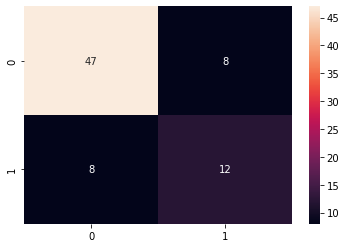

In [30]:
sns.heatmap(cm,annot=True)

In [31]:
tp,fn,fp,tn=cm.reshape(-1)

In [32]:
tp

47

In [33]:
fn

8

In [34]:
fp

8

In [35]:
tn

12

In [36]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
accuracy

0.7866666666666666

In [39]:
accuracy_score(ytest,pred)
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [40]:
precision=tp/(tp+fp)
precision

0.8545454545454545

In [41]:
sensitivity=tp/(tp+fn)
sensitivity

0.8545454545454545

In [42]:
Specificity=tn/(tn+fp)
Specificity

0.6

In [43]:
F1_Score=(precision+sensitivity)/2
F1_Score

0.8545454545454545

In [44]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        55
           1       0.60      0.60      0.60        20

    accuracy                           0.79        75
   macro avg       0.73      0.73      0.73        75
weighted avg       0.79      0.79      0.79        75



In [45]:
from sklearn.metrics import plot_roc_curve

In [46]:
import matplotlib.pyplot as plt

C:\Users\ashiq\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


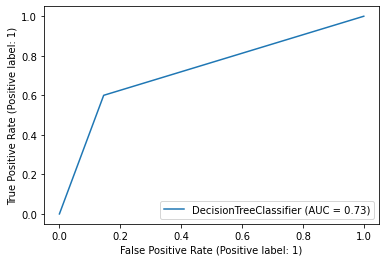

In [47]:
plot_roc_curve(dt,xtest,ytest)

# Thank You